In [ ]:
import pandas as pd
import numpy as np 

import matplotlib as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# LANDING ZONE





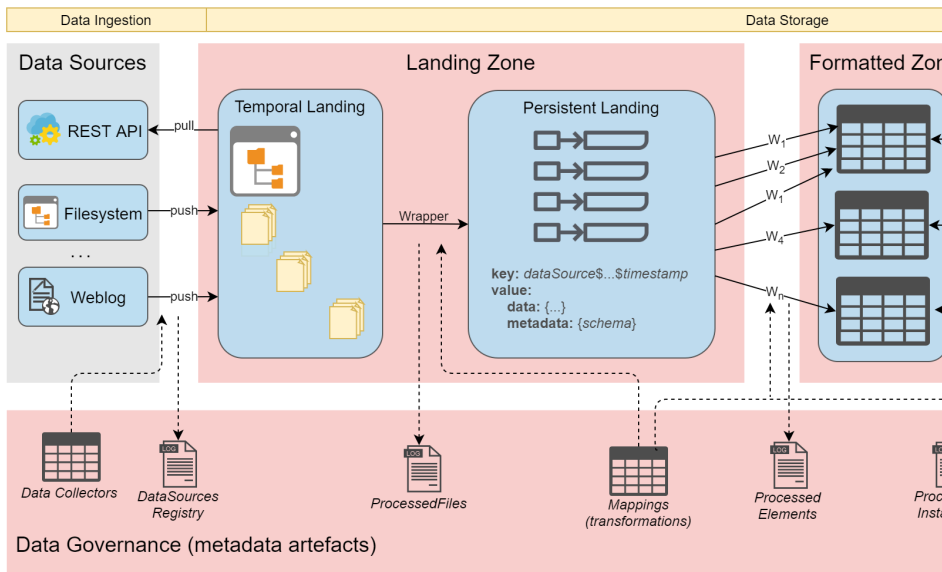

# Wrapper


- Add metadata to wrapper files
- Work with relative paths
- Add documentation

In [ ]:
import json
import calendar
import time
import os
import glob
from datetime import datetime
from os import path
import shutil

class Wrapper:
  '''Component that reads and understand data from the temporal zone and write it to the persistent zone'''
  
  # load or create a wrapper instance
  def __init__(self):
    try:
      #with open('/content/drive/MyDrive/projecteADSDB/landing/wrapper.json') as wrapper:
      with open('./landing/wrapper.json') as wrapper:
        self.wrapper = json.load(wrapper)
    except:
      self.wrapper = dict()

  # get wrapper object
  def getWrapper(self):
    return self.wrapper

  # list all datasources
  def getDataSources(self):
    print(list(self.wrapper.keys())) 

  # Read datasources from a folder (e.g: temporal)
  def readFolder(self, folder_path):

    for datasource in os.listdir(folder_path):
      file_list = os.listdir(folder_path+"/"+datasource)
      value = []
      if len(file_list):
        for filename in file_list:
          # Getting the current date and time
          current_GMT = time.gmtime()
          # getting the timestamp
          time_stamp = calendar.timegm(current_GMT)
          if "Metadata" not in filename:
            file = dict()
            file["timestamp"] = str(time_stamp)
            file["filename"] = filename
            file["temporal_path"] = folder_path+"/"+datasource
            file["persistent_path"] = ''
            value.append(file)
            
            # TODO: obtain file with that contains the Metadata substring
            # metadata_file = [metadata for metadata in file_list if "Metadata" in metadata] 
            # print(metadata_file)
            # if len(metadata_file):
            #   value["metadata"] =  pd.read_csv(temporal_folder_path+"/"+datasource+"/"+metadata_file[0], sep=",")
        if datasource not in self.wrapper.keys():
          self.wrapper[datasource] = value
        else:
          self.wrapper[datasource].extend(value)


  # get data from wrapper and put it in the persistent folder 
  def moveToPersistentFolder(self, persistentFolderPath):
    for key,datasource in self.wrapper.items():
      if path.exists(f'{persistentFolderPath}/{key}') == False:
        os.mkdir(f'{persistentFolderPath}/{key}')
      
      # file is timestamp+datasource_name
      for file in datasource:
        shutil.copy(file["temporal_path"]+"/"+file["filename"], f'{persistentFolderPath}/{key}/{key+"$"+file["timestamp"]}.csv')
        file["persistent_path"] = f'{persistentFolderPath}/{key}/{key+"$"+file["timestamp"]}.csv'
        #pd.read_json(file["data"]).to_csv(f'{persistentFolderPath}/{key}/{key+"_"+file["timestamp"]}.csv')

  def cleanDataSourcesContent(self, folder_path):
    for ds in list(self.wrapper.keys()):
      files = glob.glob(f'{folder_path}/{ds}/*')
      for f in files:
        os.remove(f)



  # print datasources with the number of elements
  def summary(self):
    for k,v in self.wrapper.items():
      print("\n\n\n===========================")
      print(f'{k} - {len(v)} files')
      print("===========================")
      for file in v:
        print(f'timestamp: {file["timestamp"]}')
        print(f'filename: {file["filename"]}')
        print(f'temporal path: {file["temporal_path"]}')

        print(f'persistent path: {file["persistent_path"]}')
        print("---------------------------")
  # save wrapper as JSON file
  def save(self):
    #with open('drive/MyDrive/projecteADSDB/landing/wrapper.json', 'w') as fp:
    with open('./landing/wrapper.json', 'w') as fp:
      json.dump(self.wrapper, fp)

  # clean all content of the wrapper
  def clean(self):
    self.wrapper = dict()

  def delete(self):
    # remove wrapper
    #os.remove("drive/MyDrive/projecteADSDB/landing/wrapper.json")
    os.remove("./landing/wrapper.json")



We create a new Wrapper

In [ ]:
test = Wrapper()

We list the DataSources (should be empty)

In [ ]:
test.getDataSources()

[]


We list the temporary files in the datasources (should be empty)

In [ ]:
test.summary()

We read the temporal folder for the first time including all the datasources and its contents

In [ ]:
#test.readFolder('/content/drive/MyDrive/projecteADSDB/landing/temporal')
test.readFolder('./landing/temporal')

We print the data sources (should be three)

In [ ]:
test.getDataSources()

['Governance_Data', 'Country_Level_Data', 'Olympics_Data']


we print the content of each data source

In [ ]:
test.summary()




Governance_Data - 1 files
timestamp: 1666445932
filename: Governance_Data.csv
temporal path: /content/drive/MyDrive/projecteADSDB/landing/temporal/Governance_Data
persistent path: /content/drive/MyDrive/projecteADSDB/landing/persistent/Governance_Data/Governance_Data$1666445932.csv
---------------------------



Country_Level_Data - 1 files
timestamp: 1666445932
filename: Country_Level_Data.csv
temporal path: /content/drive/MyDrive/projecteADSDB/landing/temporal/Country_Level_Data
persistent path: /content/drive/MyDrive/projecteADSDB/landing/persistent/Country_Level_Data/Country_Level_Data$1666445932.csv
---------------------------



Olympics_Data - 1 files
timestamp: 1666445932
filename: Olympics_Data.csv
temporal path: /content/drive/MyDrive/projecteADSDB/landing/temporal/Olympics_Data
persistent path: /content/drive/MyDrive/projecteADSDB/landing/persistent/Olympics_Data/Olympics_Data$1666445932.csv
---------------------------


test.

We save the wrapper

In [ ]:
test.save()

In [ ]:
#test.cleanDataSourcesContent('/content/drive/MyDrive/projecteADSDB/landing/temporalprova')


# MOVE TO PERSISTENT ZONE

This operation performs the data transformation between the temporal and persistent zone

In [ ]:
#test.moveToPersistentFolder('/content/drive/MyDrive/projecteADSDB/landing/persistent')
test.moveToPersistentFolder('./landing/persistent')

# Delete Wrapper


In [ ]:
#test.delete()